

## **Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ**

# Путешествие по Спрингфилду.


Сегодня вам предстоить помочь телекомпании FOX  в обработке их контента. Как вы знаете сериал Симсоны идет на телеэкранах более 25 лет и за это время скопилось очень много видео материала. Персоонажи менялись вместе с изменяющимися графическими технологиями   и Гомер 2018 не очень похож на Гомера 1989. Нашей задачей будет научиться классифицировать персонажей проживающих в Спрингфилде. Думаю, что нет смысла представлять каждого из них в отдельности.



 ![alt text](https://vignette.wikia.nocookie.net/simpsons/images/5/5a/Spider_fat_piglet.png/revision/latest/scale-to-width-down/640?cb=20111118140828)



### Установка зависимостей

In [ ]:
!pip install -U torch torchvision

     |██████████████████████████████▎ | 834.1 MB 1.5 MB/s eta 0:00:32tcmalloc: large alloc 1147494400 bytes == 0x5586f90e0000 @  0x7fb6b464d615 0x558694e5d4cc 0x558694f3d47a 0x558694e602ed 0x558694f51e1d 0x558694ed3e99 0x558694ece9ee 0x558694e61bda 0x558694ed3d00 0x558694ece9ee 0x558694e61bda 0x558694ed0737 0x558694f52c66 0x558694ecfdaf 0x558694f52c66 0x558694ecfdaf 0x558694f52c66 0x558694ecfdaf 0x558694e62039 0x558694ea5409 0x558694e60c52 0x558694ed3c25 0x558694ece9ee 0x558694e61bda 0x558694ed0737 0x558694ece9ee 0x558694e61bda 0x558694ecf915 0x558694e61afa 0x558694ecfc0d 0x558694ece9ee
     |████████████████████████████████| 881.9 MB 16 kB/s 
     |████████████████████████████████| 23.3 MB 56.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvisi

In [ ]:
# установка подходящей версии torch

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x58284000 @  0x7fdd11aa72a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [ ]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
# нам необходима версия pillow  5.3.0
# удалим старую версию и установим новую
!pip uninstall -y Pillow
!pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)
# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:
# Menu > Runtime > Restart Runtime

Found existing installation: Pillow 5.3.0
Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
  Using cached Pillow-5.3.0-cp37-cp37m-manylinux1_x86_64.whl (2.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 5.3.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


5.3.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive/

MyDrive


In [ ]:
# !unzip -q /content/gdrive/MyDrive/simpsons/data/dataset.zip -d train
# !unzip -q /content/gdrive/MyDrive/simpsons/data/testset.zip -d test

unzip:  cannot find or open /content/gdrive/My, /content/gdrive/My.zip or /content/gdrive/My.ZIP.
unzip:  cannot find or open /content/gdrive/My, /content/gdrive/My.zip or /content/gdrive/My.ZIP.


In [ ]:
!unzip -q /content/gdrive/MyDrive/journey-springfield.zip

In [ ]:
!ls -1

characters_illustration.png
gdrive
sample_data
sample_submission.csv
testset
train


In [ ]:
!ls train
!ls testset

simpsons_dataset
testset


In [ ]:
!nvidia-smi
import torch
torch.cuda.is_available()

Tue Dec 28 11:06:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    29W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

В нашем тесте будет 990 картнок, для которых вам будет необходимо предсказать класс.

In [ ]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


In [ ]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda")

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} $, <br>       константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [ ]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [ ]:
# TRAIN_DIR = Path('train/dataset')
# TEST_DIR = Path('test/testset')
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('testset/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [ ]:
val_dataset = SimpsonsDataset(val_files, mode='val')

In [ ]:
# uncomment if you have problem with pillow
# def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
# Image.register_extension = register_extension
# def register_extensions(id, extensions): 
#     for extension in extensions: register_extension(id, extension)
# Image.register_extensions = register_extensions

Давайте посмотрим на наших героев внутри датасета.

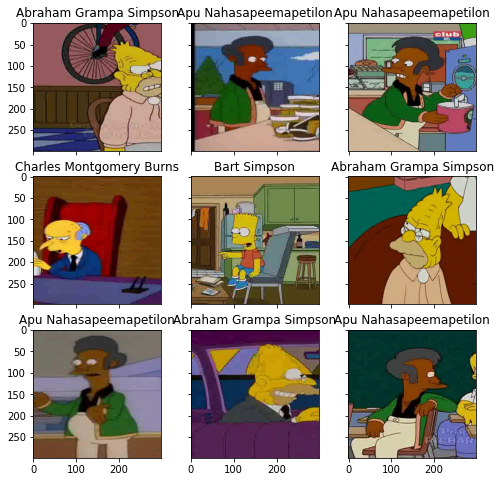

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Можете добавить ваши любимые сцены и классифицировать их. (веселые результаты можно кидать в чат)

### Построение нейросети

Запустить данную сеть будет вашим мини-заданием на первую неделю, чтобы было проще участвовать в соревновании.

Данная архитектура будет очень простой и нужна для того, чтобы установить базовое понимание и получить простенький сабмит на Kaggle

<!-- Здесь вам предлагается дописать сверточную сеть глубины 4/5.  -->

*Описание слоев*:



1. размерность входа: 3x224x224 
2.размерности после слоя:  8x111x111
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. выход: 96x5x5


In [ ]:
# Очень простая сеть
class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [ ]:
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        #changed learning rate
        opt = torch.optim.Adam(model.parameters(), lr=1e-4)
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [ ]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
print(simple_cnn)

we will classify :42
SimpleCnn(
  (conv1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv5): Sequential(
    (0): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=2400, out_fea

Запустим обучение сети.

In [ ]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=2, batch_size=64)

epoch:   0%|          | 0/2 [00:00<?, ?it/s]

loss 3.058791924163835


epoch:  50%|█████     | 1/2 [02:54<02:54, 174.87s/it]


Epoch 001 train_loss: 3.0588     val_loss 2.6734 train_acc 0.1380 val_acc 0.2524
loss 2.4120970018517935


epoch: 100%|██████████| 2/2 [05:46<00:00, 173.20s/it]


Epoch 002 train_loss: 2.4121     val_loss 2.2385 train_acc 0.3381 val_acc 0.3903


Построим кривые обучения

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

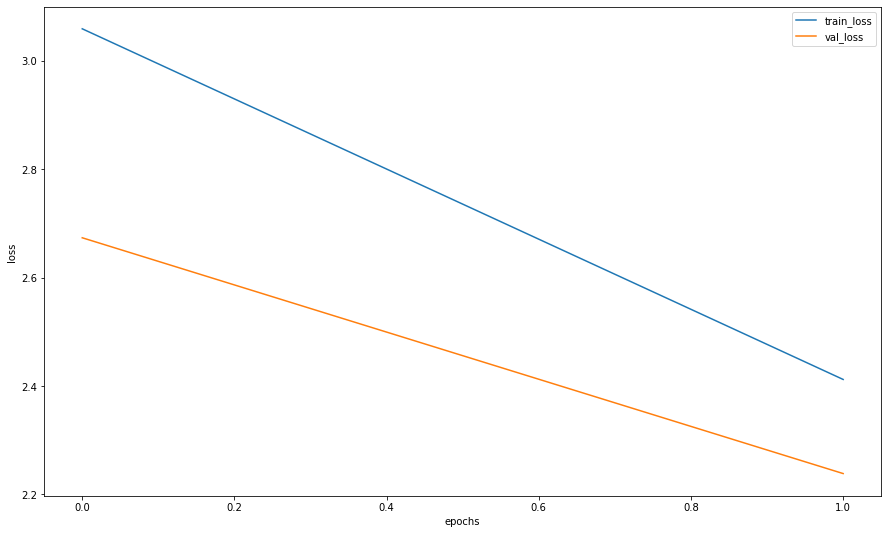

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Ну и что теперь со всем этим делать?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

Хорошо бы понять, как сделать сабмит. 
У нас есть сеть и методы eval у нее, которые позволяют перевести сеть в режим предсказания. Стоит понимать, что у нашей модели на последнем слое стоит softmax, которые позволяет получить вектор вероятностей  того, что объект относится к тому или иному классу. Давайте воспользуемся этим.

In [ ]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [ ]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(simple_cnn, ex_img.unsqueeze(0))

In [ ]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(simple_cnn, imgs)

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]
actual_string_labels = [label_encoder.classes_[i] for i in actual_labels]

preds_class = [label_encoder.classes_[i] for i in y_pred]

In [ ]:
print(preds_class)
print(actual_string_labels)

['homer_simpson', 'moe_szyslak', 'apu_nahasapeemapetilon', 'homer_simpson', 'charles_montgomery_burns', 'homer_simpson', 'abraham_grampa_simpson', 'sideshow_bob', 'lisa_simpson', 'apu_nahasapeemapetilon', 'homer_simpson', 'bart_simpson', 'apu_nahasapeemapetilon', 'lisa_simpson', 'homer_simpson', 'bart_simpson', 'homer_simpson', 'abraham_grampa_simpson', 'lisa_simpson', 'homer_simpson']
['apu_nahasapeemapetilon', 'charles_montgomery_burns', 'apu_nahasapeemapetilon', 'barney_gumble', 'charles_montgomery_burns', 'bart_simpson', 'abraham_grampa_simpson', 'charles_montgomery_burns', 'bart_simpson', 'apu_nahasapeemapetilon', 'charles_montgomery_burns', 'bart_simpson', 'apu_nahasapeemapetilon', 'bart_simpson', 'bart_simpson', 'bart_simpson', 'charles_montgomery_burns', 'abraham_grampa_simpson', 'charles_montgomery_burns', 'bart_simpson']


Обратите внимание, что метрика, которую необходимо оптимизировать в конкурсе --- f1-score. Вычислим целевую метрику на валидационной выборке.

In [ ]:
from sklearn.metrics import f1_score

f1_score(actual_string_labels, preds_class, average='micro')


1.0

Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

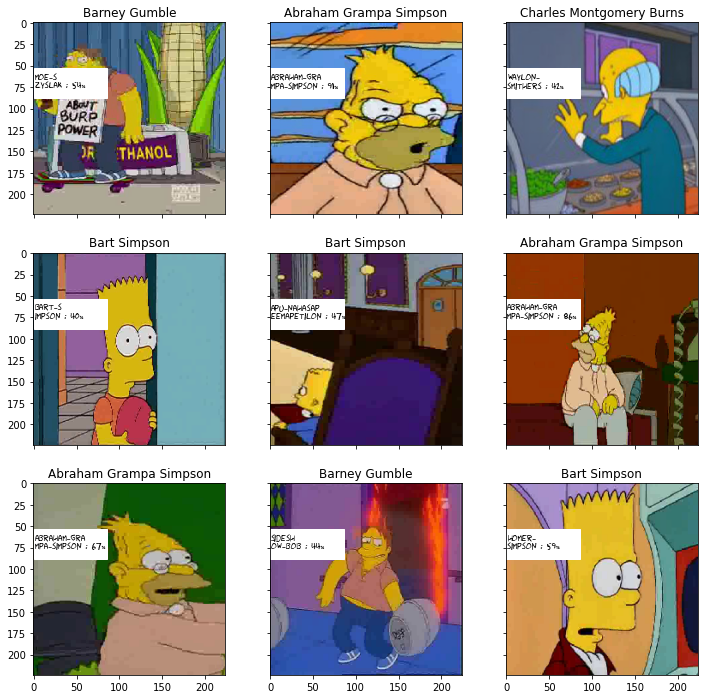

In [ ]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(simple_cnn, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Попробуйте найти те классы, которые сеть не смогла расспознать. Изучите данную проблему, это понадобится в дальнейшем.

### Submit на Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

In [ ]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(simple_cnn, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


In [ ]:
! ls 

characters_illustration.png  label_encoder.pkl	sample_submission.csv  train
gdrive			     sample_data	testset


In [ ]:
import pandas as pd
# my_submit = pd.read_csv("gdrive/MyDrive/simpsons/data/labels.csv")
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.to_csv('gdrive/MyDrive/simpsons_simple_cnn_baseline.csv', index=False)
my_submit.head()

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon


In [ ]:
# TODO : сделайте сабмит (это важно, если Вы не справляетесь, но дошли до этой ячейки, то сообщите в чат и Вам помогут)

In [ ]:
sample_submit = pd.read_csv("sample_submission.csv")
sample_submit.head()

,Id,Expected
0,img0.jpg,bart_simpson
1,img1.jpg,bart_simpson
2,img2.jpg,bart_simpson
3,img3.jpg,bart_simpson
4,img4.jpg,bart_simpson


## Приключение?

А теперь самое интересное, мы сделали простенькую сверточную сеть и смогли отправить сабмит, но получившийся скор нас явно не устраивает. Надо с этим что-то сделать. 

Несколько срочныйх улучшейни для нашей сети, которые наверняка пришли Вам в голову: 


*   Учим дольше и изменяем гиперпараметры сети
*  learning rate, batch size, нормализация картинки и вот это всё
*   Кто же так строит нейронные сети? А где пулинги и батч нормы? Надо добавлять
*  Ну разве Адам наше все? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) для практика, [статейка для любителей](https://openreview.net/pdf?id=ryQu7f-RZ) (очень хороший анализ), [наши ](https://github.com/MichaelKonobeev/adashift/) эксперименты для заинтересованных.

* Ну разве это deep learning? Вот ResNet и Inception, которые можно зафайнтьюнить под наши данные, вот это я понимаю (можно и обучить в колабе, а можно и [готовые](https://github.com/Cadene/pretrained-models.pytorch) скачать).

* Данных не очень много, можно их аугументировать и  доучититься на новом датасете ( который уже будет состоять из, как  пример аугументации, перевернутых изображений)

* Стоит подумать об ансамблях


Надеюсь, что у Вас получится!

![alt text](https://pbs.twimg.com/profile_images/798904974986113024/adcQiVdV.jpg)


### Добавим batchnorm и learning rate scheduler

In [ ]:
from torch.nn.modules.batchnorm import BatchNorm2d

#simple CNN with bathNorm
class CnnWithBatchNorm(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.BatchNorm2d(8)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.BatchNorm2d(16)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.BatchNorm2d(32)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.BatchNorm2d(64)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.BatchNorm2d(96)
        )
        
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [ ]:
n_classes = len(np.unique(train_val_labels))
cnn_with_batchnorm = CnnWithBatchNorm(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
print(cnn_with_batchnorm)

we will classify :42
CnnWithBatchNorm(
  (conv1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2

In [ ]:
# Добавим в train phase scheduler
def fit_epoch(model, train_loader, criterion, optimizer, scheduler=None):
    # Вот сюда
    if scheduler is not None:
        scheduler.step()
        
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [ ]:
from torch.optim import lr_scheduler

In [ ]:
# Соотетственно добавим здесь
def train(train_dataset, val_dataset, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        #changed learning rate
        opt = torch.optim.Adam(model.parameters(), lr=1e-4)
        criterion = nn.CrossEntropyLoss()
        #Вот сюда
        exp_lr_scheduler = lr_scheduler.StepLR(opt, step_size=3, gamma=0.1)

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt, exp_lr_scheduler)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [ ]:
history = train(train_dataset, val_dataset, model=cnn_with_batchnorm, epochs=11, batch_size=64)

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

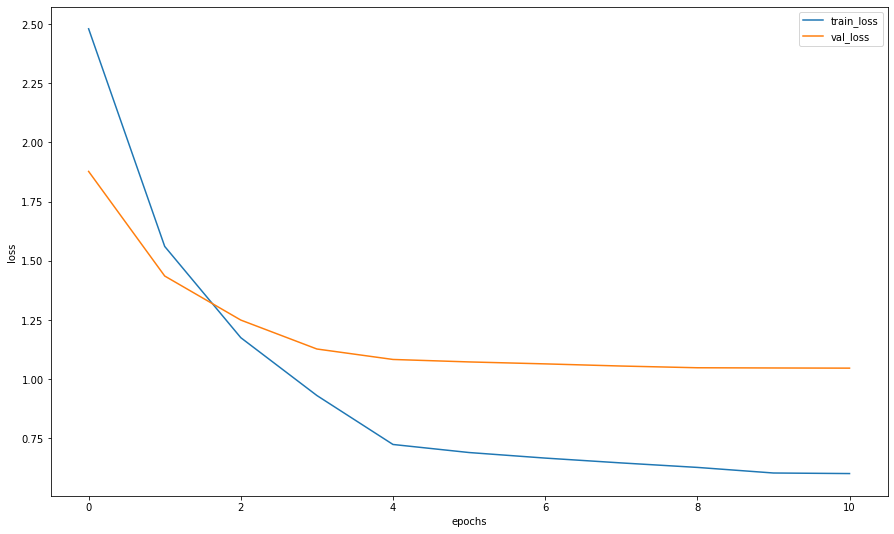

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

=> 6 эпох было бы достаточно

In [ ]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(cnn_with_batchnorm, ex_img.unsqueeze(0))

In [ ]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(cnn_with_batchnorm, imgs)

In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]
actual_string_labels = [label_encoder.classes_[i] for i in actual_labels]

preds_class = [label_encoder.classes_[i] for i in y_pred]

In [ ]:
f1_score(actual_string_labels, preds_class, average='micro')

0.6

In [ ]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(cnn_with_batchnorm, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]

In [ ]:
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.to_csv('gdrive/MyDrive/simpsons_simple_cnn_with_batchnorm.csv', index=False)
my_submit.head()

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon


Итоговый Score: 0.78746.

### Теперь попробуем на основе Inception ###


In [ ]:
from torchvision import models

In [ ]:
# Для начала преобразуем трансформацию данных
# (изменим на размер, подходящий модели, и добавим некоторые преобразования)
RESCALE_SIZE = 299
class SimpsonsDatasetForInception(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # вот здесь
        if self.mode == 'train':
            transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.RandomResizedCrop(RESCALE_SIZE),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        else:
            transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize(RESCALE_SIZE),
                transforms.CenterCrop(RESCALE_SIZE),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
val_dataset_inc = SimpsonsDatasetForInception(val_files, mode='val')
    
train_dataset_inc = SimpsonsDatasetForInception(train_files, mode='train')

In [ ]:
model = models.inception_v3(pretrained=True)

In [ ]:
print(model)

In [ ]:
n_classes = len(np.unique(train_val_labels))
model.AuxLogits.fc = nn.Linear(768, n_classes)
model = model.to(DEVICE)


In [ ]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 25088
# Заменяем Fully-Connected слой на линейный классификатор
model.classifier = nn.Linear(num_features, n_classes)

In [ ]:
model.aux_logits = False
history = train(train_dataset_inc, val_dataset_inc, model=model, epochs=6, batch_size=64)

epoch:   0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Streaming output truncated to the last 5000 lines.
        [[-1.2467, -1.2816, -1.2990,  ..., -0.6541, -0.6541, -0.6541],
         [-0.5495, -0.5495, -0.5844,  ...,  0.1128,  0.1128,  0.1128],
         [-0.4624, -0.4624, -0.4973,  ...,  0.2173,  0.2173,  0.2173],
         ...,
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3339, -1.3687],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4036],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4384]]])
y after transformation is 37
x after transformation is tensor([[[-0.5767, -0.5596, -0.5424,  ..., -0.5767, -0.5938, -0.5938],
         [ 0.0056,  0.0227,  0.0227,  ...,  0.2796,  0.2624,  0.2624],
         [ 0.0227,  0.0227,  0.0227,  ...,  0.4166,  0.3994,  0.3994],
         ...,
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638]],

        [[

epoch:  17%|█▋        | 1/6 [16:13<1:21:06, 973.28s/it]

Streaming output truncated to the last 5000 lines.
        [[-1.2467, -1.2816, -1.2990,  ..., -0.6541, -0.6541, -0.6541],
         [-0.5495, -0.5495, -0.5844,  ...,  0.1128,  0.1128,  0.1128],
         [-0.4624, -0.4624, -0.4973,  ...,  0.2173,  0.2173,  0.2173],
         ...,
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3339, -1.3687],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4036],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4384]]])
y after transformation is 37
x after transformation is tensor([[[-0.5767, -0.5596, -0.5424,  ..., -0.5767, -0.5938, -0.5938],
         [ 0.0056,  0.0227,  0.0227,  ...,  0.2796,  0.2624,  0.2624],
         [ 0.0227,  0.0227,  0.0227,  ...,  0.4166,  0.3994,  0.3994],
         ...,
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638]],

        [[

epoch:  33%|███▎      | 2/6 [32:17<1:04:31, 967.84s/it]

Streaming output truncated to the last 5000 lines.
        [[-1.2467, -1.2816, -1.2990,  ..., -0.6541, -0.6541, -0.6541],
         [-0.5495, -0.5495, -0.5844,  ...,  0.1128,  0.1128,  0.1128],
         [-0.4624, -0.4624, -0.4973,  ...,  0.2173,  0.2173,  0.2173],
         ...,
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3339, -1.3687],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4036],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4384]]])
y after transformation is 37
x after transformation is tensor([[[-0.5767, -0.5596, -0.5424,  ..., -0.5767, -0.5938, -0.5938],
         [ 0.0056,  0.0227,  0.0227,  ...,  0.2796,  0.2624,  0.2624],
         [ 0.0227,  0.0227,  0.0227,  ...,  0.4166,  0.3994,  0.3994],
         ...,
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638]],

        [[

epoch:  50%|█████     | 3/6 [48:22<48:20, 966.80s/it]

Streaming output truncated to the last 5000 lines.
        [[-1.2467, -1.2816, -1.2990,  ..., -0.6541, -0.6541, -0.6541],
         [-0.5495, -0.5495, -0.5844,  ...,  0.1128,  0.1128,  0.1128],
         [-0.4624, -0.4624, -0.4973,  ...,  0.2173,  0.2173,  0.2173],
         ...,
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3339, -1.3687],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4036],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4384]]])
y after transformation is 37
x after transformation is tensor([[[-0.5767, -0.5596, -0.5424,  ..., -0.5767, -0.5938, -0.5938],
         [ 0.0056,  0.0227,  0.0227,  ...,  0.2796,  0.2624,  0.2624],
         [ 0.0227,  0.0227,  0.0227,  ...,  0.4166,  0.3994,  0.3994],
         ...,
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638]],

        [[

epoch:  67%|██████▋   | 4/6 [1:04:30<32:13, 966.95s/it]

Streaming output truncated to the last 5000 lines.
        [[-1.2467, -1.2816, -1.2990,  ..., -0.6541, -0.6541, -0.6541],
         [-0.5495, -0.5495, -0.5844,  ...,  0.1128,  0.1128,  0.1128],
         [-0.4624, -0.4624, -0.4973,  ...,  0.2173,  0.2173,  0.2173],
         ...,
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3339, -1.3687],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4036],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4384]]])
y after transformation is 37
x after transformation is tensor([[[-0.5767, -0.5596, -0.5424,  ..., -0.5767, -0.5938, -0.5938],
         [ 0.0056,  0.0227,  0.0227,  ...,  0.2796,  0.2624,  0.2624],
         [ 0.0227,  0.0227,  0.0227,  ...,  0.4166,  0.3994,  0.3994],
         ...,
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638]],

        [[

epoch:  83%|████████▎ | 5/6 [1:20:49<16:11, 971.31s/it]

Streaming output truncated to the last 5000 lines.
        [[-1.2467, -1.2816, -1.2990,  ..., -0.6541, -0.6541, -0.6541],
         [-0.5495, -0.5495, -0.5844,  ...,  0.1128,  0.1128,  0.1128],
         [-0.4624, -0.4624, -0.4973,  ...,  0.2173,  0.2173,  0.2173],
         ...,
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3339, -1.3687],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4036],
         [-0.4973, -0.5495, -0.6541,  ..., -1.2641, -1.3513, -1.4384]]])
y after transformation is 37
x after transformation is tensor([[[-0.5767, -0.5596, -0.5424,  ..., -0.5767, -0.5938, -0.5938],
         [ 0.0056,  0.0227,  0.0227,  ...,  0.2796,  0.2624,  0.2624],
         [ 0.0227,  0.0227,  0.0227,  ...,  0.4166,  0.3994,  0.3994],
         ...,
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638],
         [ 0.1083,  0.1083,  0.1083,  ..., -1.9638, -1.9638, -1.9638]],

        [[

epoch: 100%|██████████| 6/6 [1:37:07<00:00, 971.26s/it]


Epoch 006 train_loss: 0.3575     val_loss 0.1223 train_acc 0.9061 val_acc 0.9702


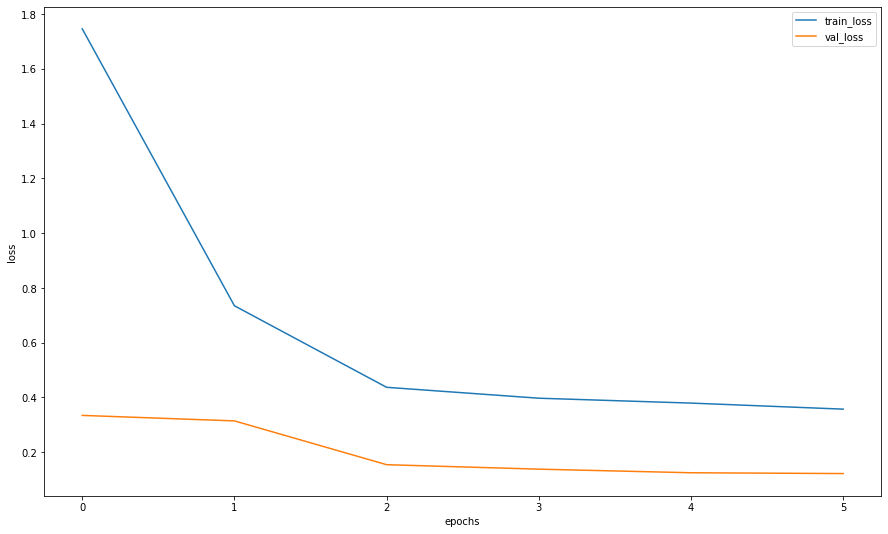

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
from sklearn.metrics import f1_score

random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset_inc[random_characters]
probs_im = predict_one_sample(model, ex_img.unsqueeze(0))

idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset_inc[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(model, imgs)

y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset_inc[id][1] for id in idxs]
actual_string_labels = [label_encoder.classes_[i] for i in actual_labels]

preds_class = [label_encoder.classes_[i] for i in y_pred]

f1_score(actual_string_labels, preds_class, average='micro')

In [ ]:
test_dataset = SimpsonsDatasetForInception(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(model, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]

In [ ]:
import pandas as pd
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.to_csv('gdrive/MyDrive/simpsons_inception.csv', index=False)
my_submit.head()

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon


Итоговый score: 0.97768.